## ================================ PT. 3 ================================
#  >>>>>>>>>>>>>>>>>>>> MACHINE LEARNING <<<<<<<<<<<<<<<<<<<<
## =====================================================================

In [1]:
import numpy as np
import geopandas as gpd
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Time-Series Machine Learning on 2011-2019 Data
### ––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

# Regression for Dataset 2
###  –––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

In [2]:
BusMRTGeoData = pd.read_csv('BusMRTGeoDataSubzone.csv')
BusMRTGeoData

,SUBZONE_N,BUS_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK,BUS_TAP_IN_TAP_OUT_VOLUME_PEAK,BUS_TAP_IN_TAP_OUT_VOLUME_WEEKDAY,BUS_TAP_IN_TAP_OUT_VOLUME_WEEKLY,BUS_PEAK_HOUR_PERCENTAGE (%),BUS_WEEKDAY_PERCENTAGE (%),MRT_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK,MRT_TAP_IN_TAP_OUT_VOLUME_PEAK,MRT_TAP_IN_TAP_OUT_VOLUME_WEEKDAY,...,TAP_IN_TAP_OUT_VOLUME_WEEKDAY,TAP_IN_TAP_OUT_VOLUME_WEEKLY,PEAK_HOUR_PERCENTAGE (%),WEEKDAY_PERCENTAGE (%),"('2020', 'Male Percentage')","('2020', '00 - 19')","('2020', '20 - 39')","('2020', '40 - 59')","('2020', '60 & Over')","('2020', 'Average Income')"
0,ALJUNIED,272101.0,1524723.0,1602735.0,9329329.0,16.343330,85.897657,205135.0,1125054.0,1067636.0,...,2670371.0,15454280.0,17.145910,86.395840,0.493623,6150,10720,12170,10940,11730.102220
1,ANAK BUKIT,78683.0,435307.0,478669.0,2742579.0,15.872177,87.266219,68900.0,383243.0,371088.0,...,849757.0,4909818.0,16.671697,86.536507,0.474166,4280,5660,6190,5750,19739.484317
2,ANCHORVALE,80421.0,443213.0,542681.0,3076215.0,14.407738,88.205961,42201.0,231522.0,269032.0,...,811713.0,4596871.0,14.678136,88.289730,0.492519,13550,14460,13710,6410,10559.805071
3,BEDOK NORTH,514937.0,2876278.0,3408440.0,19588547.0,14.683468,87.000838,185128.0,1020027.0,1017300.0,...,4425740.0,25472206.0,15.296300,86.873905,0.485093,13230,20760,24610,23260,8815.353975
4,BEDOK RESERVOIR,107940.0,598335.0,651821.0,3731588.0,16.034326,87.338286,47536.0,256282.0,226403.0,...,878224.0,5012083.0,17.051134,87.610680,0.489988,5280,6820,7960,5420,12406.950807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,WOODLANDS EAST,283127.0,1552276.0,1710348.0,9687117.0,16.024128,88.279516,289600.0,1574654.0,1579028.0,...,3289376.0,18614145.0,16.798676,88.356892,0.499949,23130,30470,31480,13910,9709.300993
82,WOODLANDS WEST,129634.0,719971.0,850840.0,4838125.0,14.881199,87.930758,125307.0,689116.0,728756.0,...,1579596.0,8975706.0,15.698899,87.992855,0.508994,6220,10300,9840,7560,7374.195426
83,YEW TEE,107981.0,598776.0,708942.0,4064449.0,14.732034,87.212559,194970.0,1054779.0,1037986.0,...,1746928.0,9926964.0,16.657208,87.989037,0.497771,8460,11480,13730,6730,11017.340267
84,YIO CHU KANG,114012.0,604035.0,549487.0,3002239.0,20.119484,91.512868,174329.0,916778.0,815902.0,...,1365389.0,7430472.0,20.467246,91.877676,NaN,0,0,0,0,NaN


In [3]:
BusMRTGeoData_reg = BusMRTGeoData.filter(['SUBZONE_N', 'TAP_IN_TAP_OUT_VOLUME_WEEKLY', 'PEAK_HOUR_PERCENTAGE (%)', 'WEEKDAY_PERCENTAGE (%)', "('2020', 'Male Percentage')", "('2020', '00 - 19')", "('2020', '20 - 39')", "('2020', '40 - 59')", "('2020', '60 & Over')", "('2020', 'Average Income')"], axis = 1)
BusMRTGeoData_reg['PEAK_HOUR_PERCENTAGE (%)'] = BusMRTGeoData_reg['PEAK_HOUR_PERCENTAGE (%)']/100
BusMRTGeoData_reg['WEEKDAY_PERCENTAGE (%)'] = BusMRTGeoData_reg['WEEKDAY_PERCENTAGE (%)']/100
BusMRTGeoData_reg = BusMRTGeoData_reg.rename(columns={'PEAK_HOUR_PERCENTAGE (%)': 'Peak Hour Percentage'})
BusMRTGeoData_reg = BusMRTGeoData_reg.rename(columns={"WEEKDAY_PERCENTAGE (%)": 'Weekday Percentage'})
BusMRTGeoData_reg = BusMRTGeoData_reg.rename(columns={"('2020', 'Male Percentage')": 'Male Percentage'})
BusMRTGeoData_reg = BusMRTGeoData_reg.rename(columns={"('2020', '00 - 19')": '00 - 19'})
BusMRTGeoData_reg = BusMRTGeoData_reg.rename(columns={"('2020', '20 - 39')": '20 - 39'})
BusMRTGeoData_reg = BusMRTGeoData_reg.rename(columns={"('2020', '40 - 59')": '40 - 59'})
BusMRTGeoData_reg = BusMRTGeoData_reg.rename(columns={"('2020', '60 & Over')": '60 & Over'})
BusMRTGeoData_reg = BusMRTGeoData_reg.rename(columns={"('2020', 'Average Income')": 'Average Income'})
BusMRTGeoData_reg['Male Percentage'] = BusMRTGeoData_reg['Male Percentage'].replace(np.nan, 0) #Replace '-' with '0'
BusMRTGeoData_reg['Average Income'] = BusMRTGeoData_reg['Average Income'].replace(np.nan, 0) #Replace '-' with '0'
BusMRTGeoData_reg

,SUBZONE_N,TAP_IN_TAP_OUT_VOLUME_WEEKLY,Peak Hour Percentage,Weekday Percentage,Male Percentage,00 - 19,20 - 39,40 - 59,60 & Over,Average Income
0,ALJUNIED,15454280.0,0.171459,0.863958,0.493623,6150,10720,12170,10940,11730.102220
1,ANAK BUKIT,4909818.0,0.166717,0.865365,0.474166,4280,5660,6190,5750,19739.484317
2,ANCHORVALE,4596871.0,0.146781,0.882897,0.492519,13550,14460,13710,6410,10559.805071
3,BEDOK NORTH,25472206.0,0.152963,0.868739,0.485093,13230,20760,24610,23260,8815.353975
4,BEDOK RESERVOIR,5012083.0,0.170511,0.876107,0.489988,5280,6820,7960,5420,12406.950807
...,...,...,...,...,...,...,...,...,...,...
81,WOODLANDS EAST,18614145.0,0.167987,0.883569,0.499949,23130,30470,31480,13910,9709.300993
82,WOODLANDS WEST,8975706.0,0.156989,0.879929,0.508994,6220,10300,9840,7560,7374.195426
83,YEW TEE,9926964.0,0.166572,0.879890,0.497771,8460,11480,13730,6730,11017.340267
84,YIO CHU KANG,7430472.0,0.204672,0.918777,0.000000,0,0,0,0,0.000000


## Uni-Variate Linear Models

### Variable 1: Predicting TAP_IN_TAP_OUT_VOLUME_WEEKLY using Peak Hour Percentage

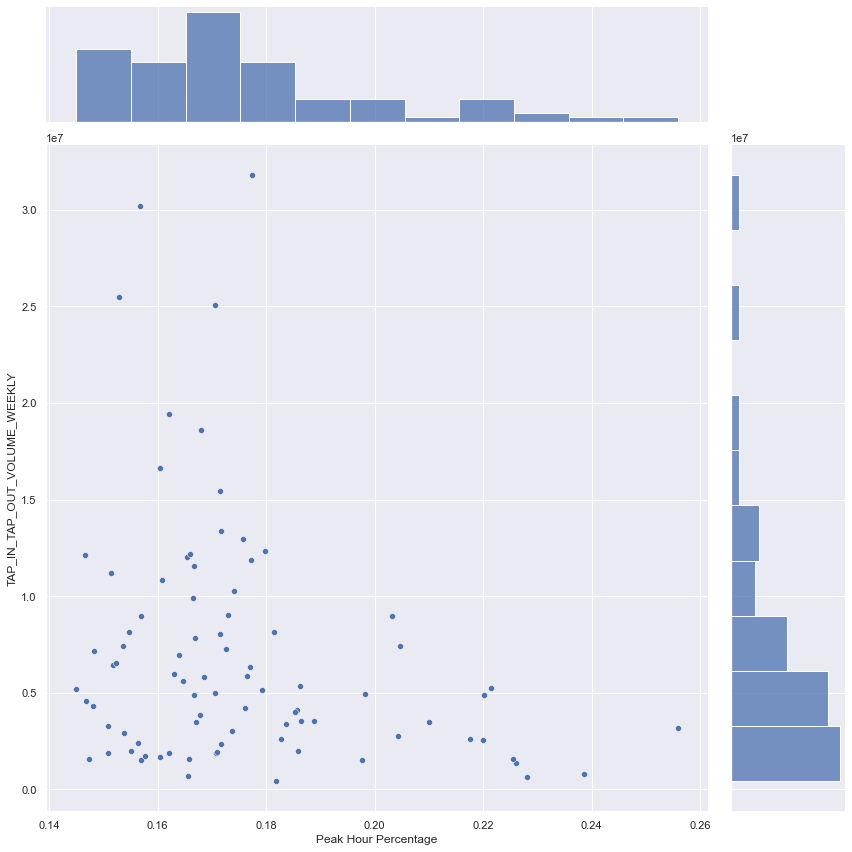

In [4]:
sb.jointplot(data = BusMRTGeoData_reg, x = 'Peak Hour Percentage', y = 'TAP_IN_TAP_OUT_VOLUME_WEEKLY', height = 12)

In [5]:
BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'].corr(BusMRTGeoData_reg['Peak Hour Percentage'])

-0.2516931050720493

In [6]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg['Peak Hour Percentage'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (64, 1) (64, 1)
Test Set  : (22, 1) (22, 1)


In [7]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

In [8]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [20875711.43399805]
Coefficients 	: a =  [[-76999912.20592208]]


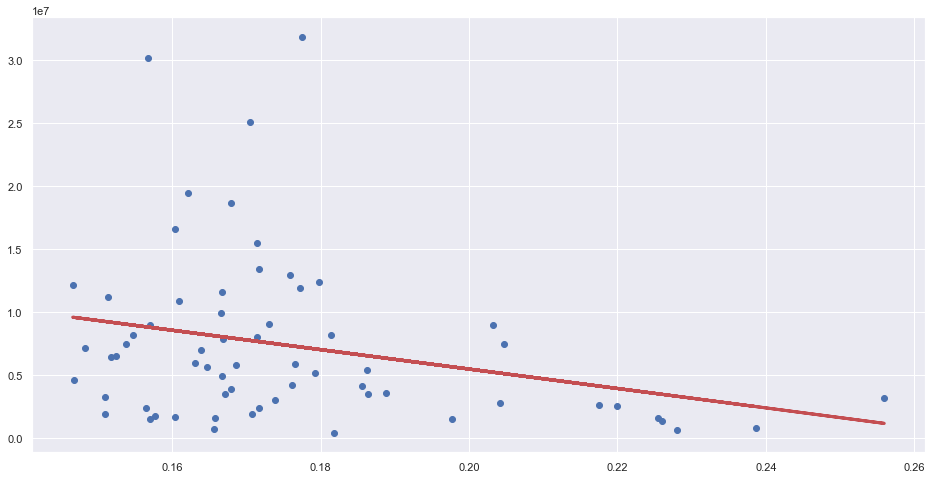

In [9]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [10]:
# Explained Variance in simply the "Score"
ev1 = linreg.score(X_train, y_train)
print("Explained Variance (R^2) \t:", ev1)

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
mse1 = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse1)

Explained Variance (R^2) 	: 0.07520329940145765
Mean Squared Error (MSE) 	: 40552008295454.7


#### Prediction of Response based on the Predictor

Predict `TAP_IN_TAP_OUT_VOLUME_WEEKLY` given `Peak Hour Percentage` in the Test dataset.

In [11]:
y_test_pred = linreg.predict(X_test)

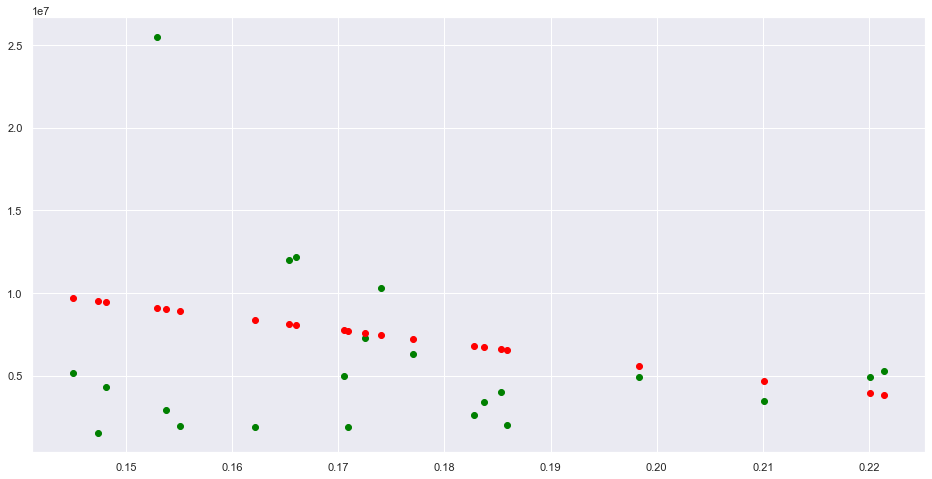

In [12]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [13]:
# Explained Variance in simply the "Score"
evTest1 = linreg.score(X_test, y_test)
print("Explained Variance (R^2) \t:", evTest1)
mseTest1 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mseTest1)

Explained Variance (R^2) 	: -0.07525842362167179
Mean Squared Error (MSE) 	: 29520223808153.3


### Variable 2: Predicting TAP_IN_TAP_OUT_VOLUME_WEEKLY using Weekday Percentage

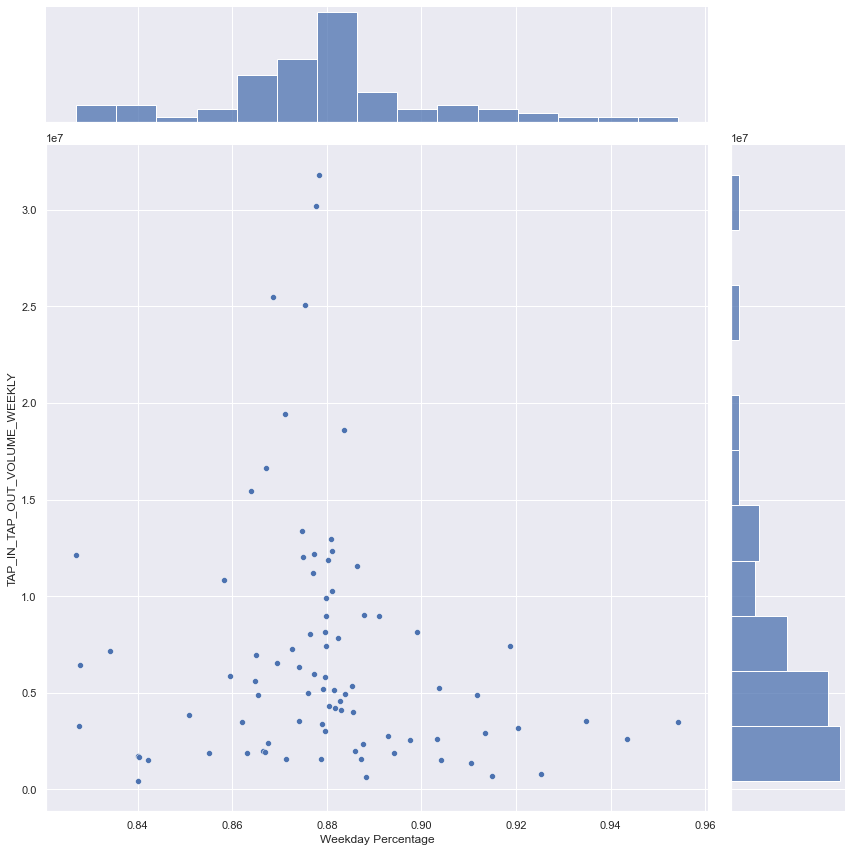

In [14]:
sb.jointplot(data = BusMRTGeoData_reg, x = 'Weekday Percentage', y = 'TAP_IN_TAP_OUT_VOLUME_WEEKLY', height = 12)

In [15]:
BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'].corr(BusMRTGeoData_reg['Weekday Percentage'])

-0.12952487449334363

In [16]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg['Weekday Percentage'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (64, 1) (64, 1)
Test Set  : (22, 1) (22, 1)


In [17]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

In [18]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [26247396.18070697]
Coefficients 	: a =  [[-22294987.52782027]]


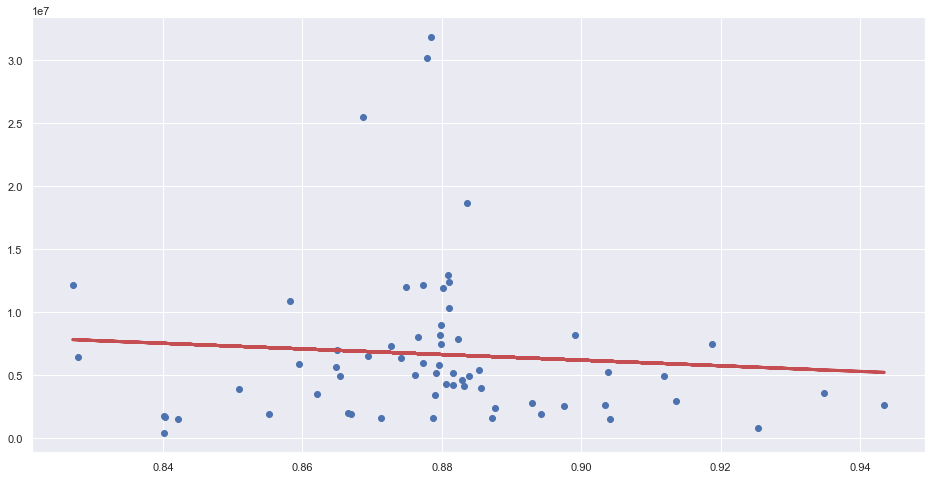

In [19]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [20]:
# Explained Variance in simply the "Score"
ev2 = linreg.score(X_train, y_train)
print("Explained Variance (R^2) \t:", ev2)

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
mse2 = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse2)

Explained Variance (R^2) 	: 0.00640658453517573
Mean Squared Error (MSE) 	: 37974743931284.305


#### Prediction of Response based on the Predictor

Predict `TAP_IN_TAP_OUT_VOLUME_WEEKLY` given `Weekday Percentage` in the Test dataset.

In [21]:
y_test_pred = linreg.predict(X_test)

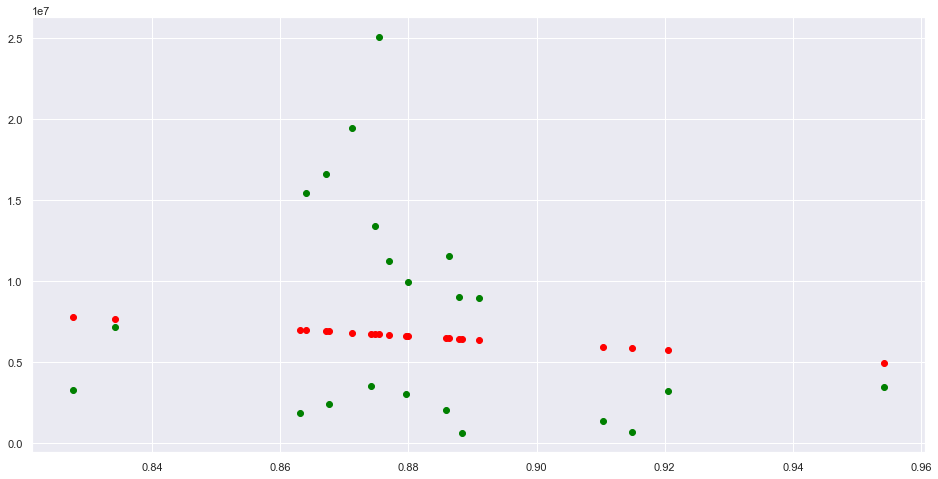

In [22]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [23]:
# Explained Variance in simply the "Score"
evTest2 = linreg.score(X_test, y_test)
print("Explained Variance (R^2) \t:", evTest2)
mseTest2 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mseTest2)

Explained Variance (R^2) 	: 0.0005101903146543796
Mean Squared Error (MSE) 	: 44334247529848.08


### Variable 3: Predicting TAP_IN_TAP_OUT_VOLUME_WEEKLY using Male Percentage

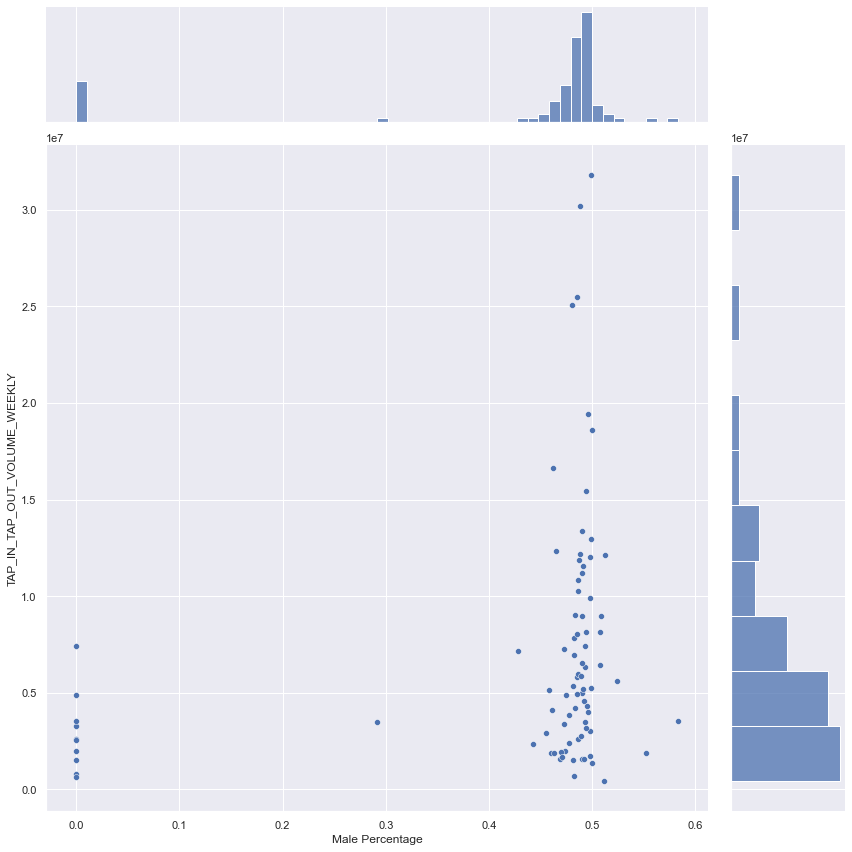

In [24]:
sb.jointplot(data = BusMRTGeoData_reg, x = 'Male Percentage', y = 'TAP_IN_TAP_OUT_VOLUME_WEEKLY', height = 12)

In [25]:
BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'].corr(BusMRTGeoData_reg['Male Percentage'])

0.24232609709596914

In [26]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg['Male Percentage'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (64, 1) (64, 1)
Test Set  : (22, 1) (22, 1)


In [27]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

In [28]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [3004746.38708593]
Coefficients 	: a =  [[9808087.81542462]]


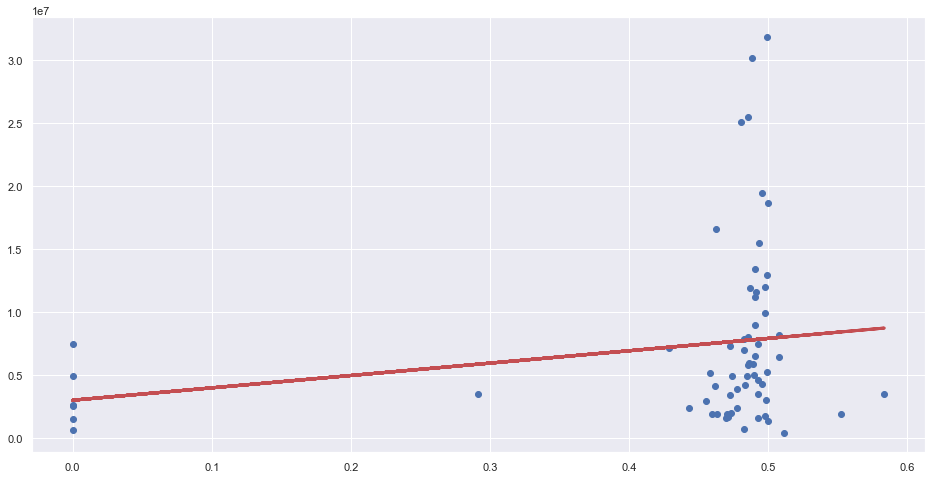

In [29]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [30]:
# Explained Variance in simply the "Score"
ev3 = linreg.score(X_train, y_train)
print("Explained Variance (R^2) \t:", ev3)

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
mse3 = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse3)

Explained Variance (R^2) 	: 0.04135263981925097
Mean Squared Error (MSE) 	: 46542105530057.46


#### Prediction of Response based on the Predictor

Predict `TAP_IN_TAP_OUT_VOLUME_WEEKLY` given `Male Percentage` in the Test dataset.

In [31]:
y_test_pred = linreg.predict(X_test)

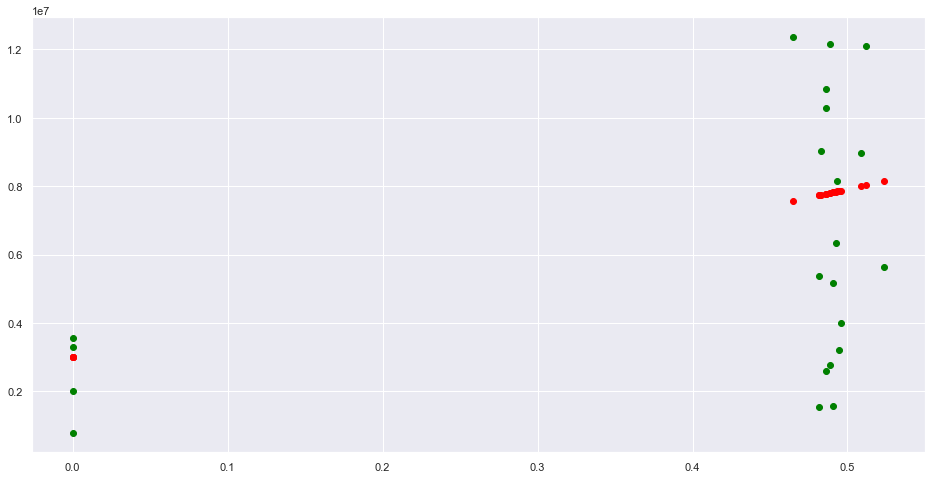

In [32]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [33]:
# Explained Variance in simply the "Score"
evTest3 = linreg.score(X_test, y_test)
print("Explained Variance (R^2) \t:", evTest3)
mseTest3 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mseTest3)

Explained Variance (R^2) 	: 0.1301519821125895
Mean Squared Error (MSE) 	: 12305939639360.832


### Variable 4: Predicting TAP_IN_TAP_OUT_VOLUME_WEEKLY using 00 - 19

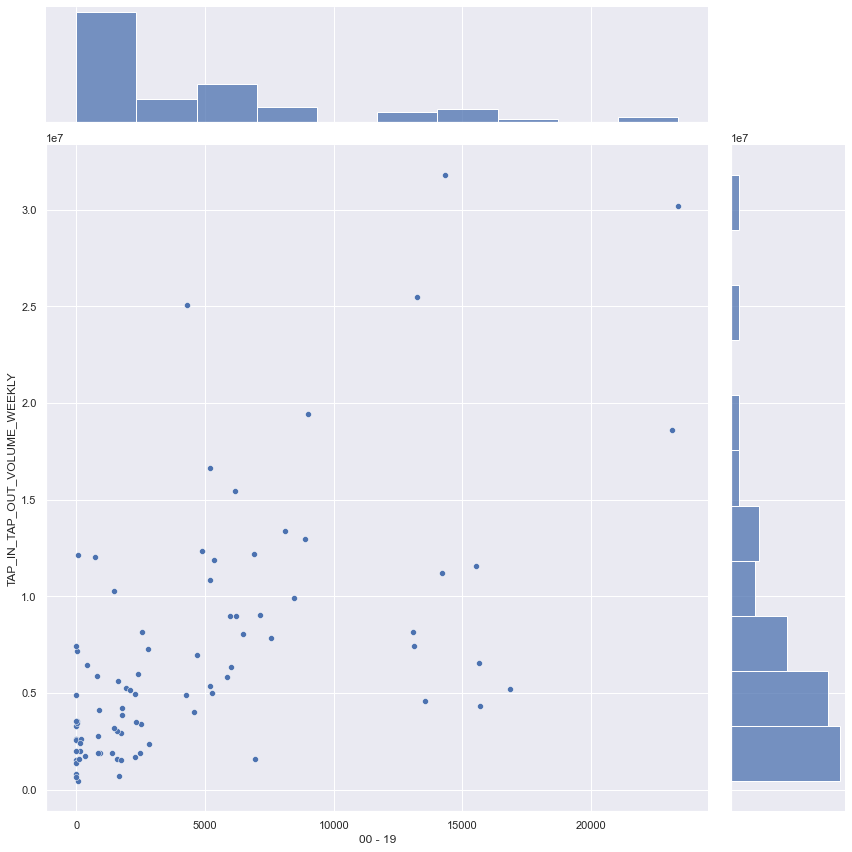

In [34]:
sb.jointplot(data = BusMRTGeoData_reg, x = '00 - 19', y = 'TAP_IN_TAP_OUT_VOLUME_WEEKLY', height = 12)

In [35]:
BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'].corr(BusMRTGeoData_reg['00 - 19'])

0.6164596239700507

In [36]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg['00 - 19'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (64, 1) (64, 1)
Test Set  : (22, 1) (22, 1)


In [37]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

In [38]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [3701941.98819168]
Coefficients 	: a =  [[638.60605252]]


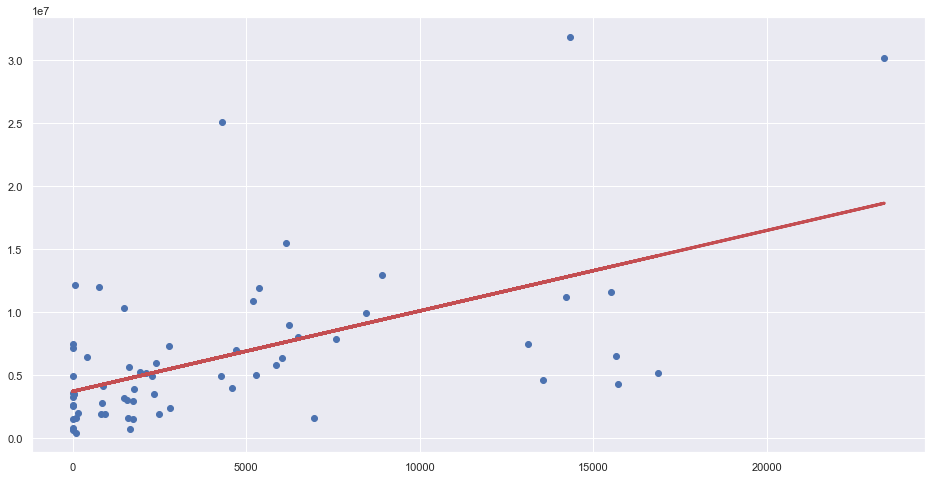

In [39]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [40]:
# Explained Variance in simply the "Score"
ev4 = linreg.score(X_train, y_train)
print("Explained Variance (R^2) \t:", ev4)

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
mse4 = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse4)

Explained Variance (R^2) 	: 0.30745114896496084
Mean Squared Error (MSE) 	: 25914614704157.48


#### Prediction of Response based on the Predictor

Predict `TAP_IN_TAP_OUT_VOLUME_WEEKLY` given `00 - 19` in the Test dataset.

In [41]:
y_test_pred = linreg.predict(X_test)

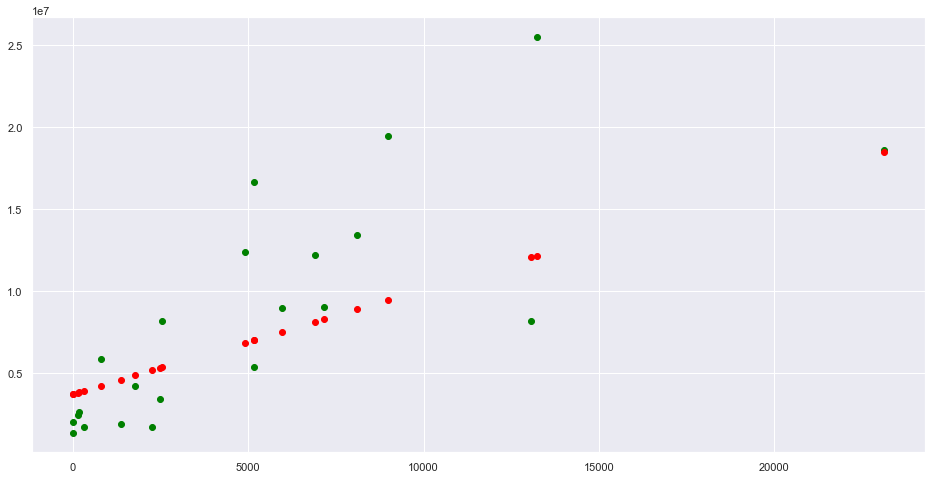

In [42]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [43]:
# Explained Variance in simply the "Score"
evTest4 = linreg.score(X_test, y_test)
print("Explained Variance (R^2) \t:", evTest4)
mseTest4 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mseTest4)

Explained Variance (R^2) 	: 0.4874394040028105
Mean Squared Error (MSE) 	: 23083987098535.746


### Variable 5: Predicting AP_IN_TAP_OUT_VOLUME_WEEKLY using 20 - 39

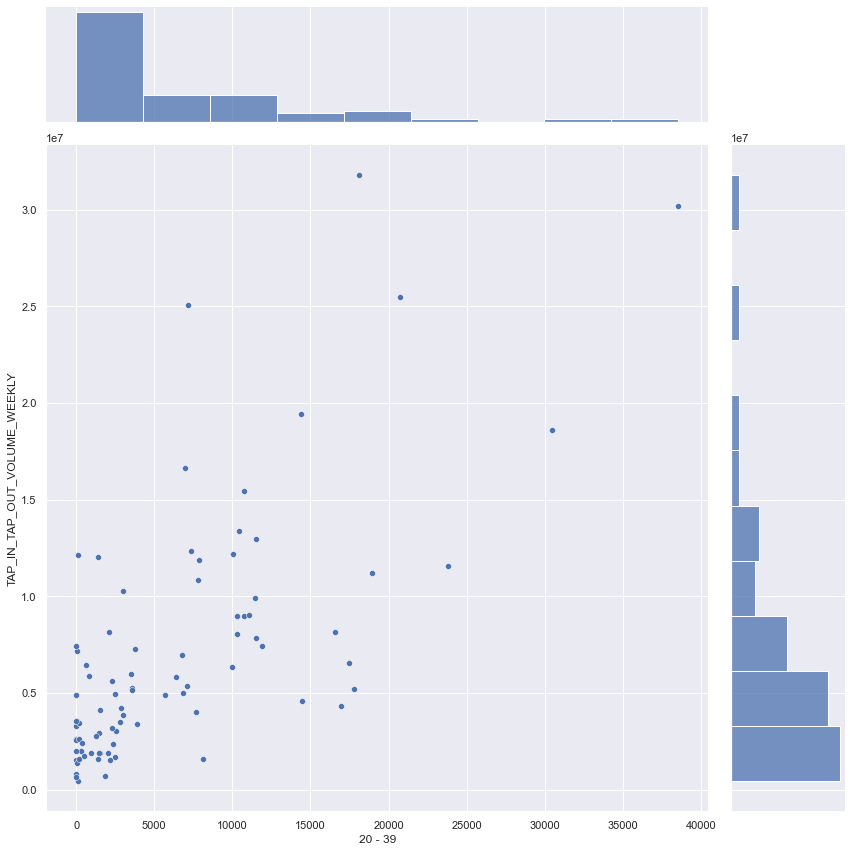

In [44]:
sb.jointplot(data = BusMRTGeoData_reg, x = '20 - 39', y = 'TAP_IN_TAP_OUT_VOLUME_WEEKLY', height = 12)

In [45]:
BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'].corr(BusMRTGeoData_reg['20 - 39'])

0.6952759625021925

In [46]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg['20 - 39'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (64, 1) (64, 1)
Test Set  : (22, 1) (22, 1)


In [47]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

In [48]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [4104049.9104255]
Coefficients 	: a =  [[533.29238545]]


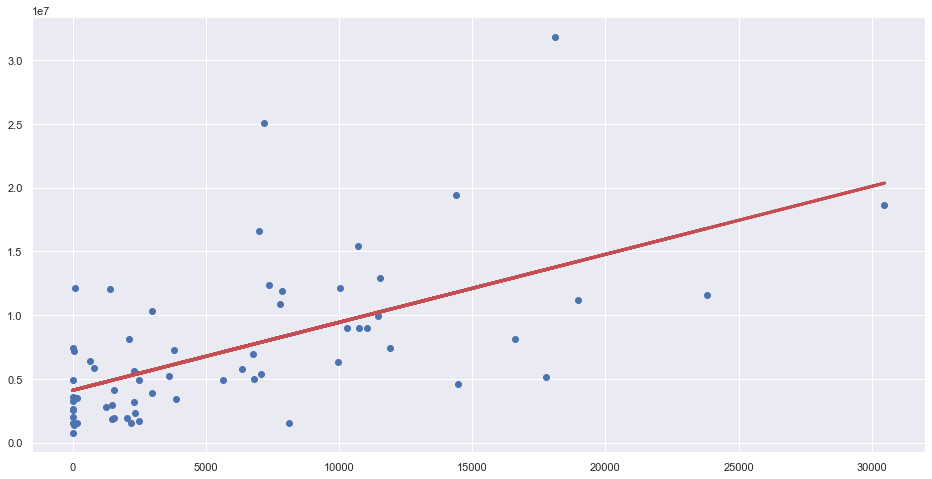

In [49]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [50]:
# Explained Variance in simply the "Score"
ev5 = linreg.score(X_train, y_train)
print("Explained Variance (R^2) \t:", ev5)

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
mse5 = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse5)

Explained Variance (R^2) 	: 0.35204378143691084
Mean Squared Error (MSE) 	: 22201324155623.35


#### Prediction of Response based on the Predictor

Predict `TAP_IN_TAP_OUT_VOLUME_WEEKLY` given `20 - 39` in the Test dataset.

In [51]:
y_test_pred = linreg.predict(X_test)

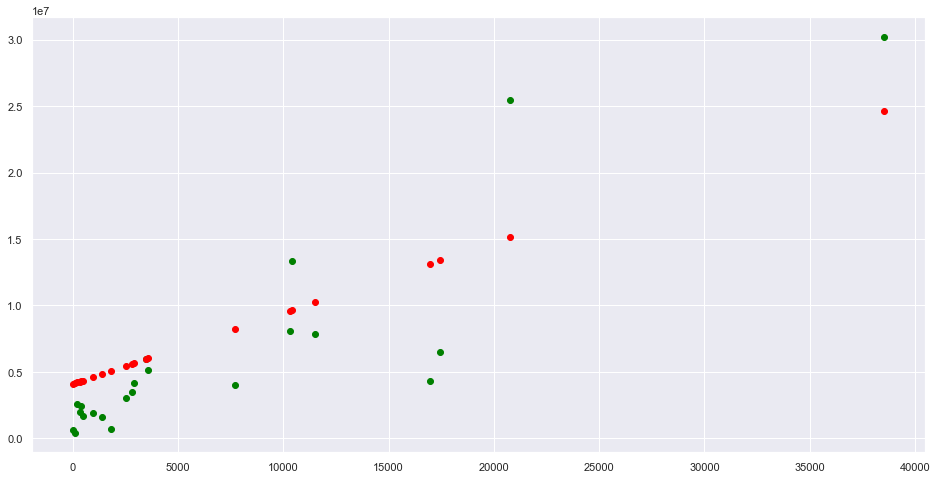

In [52]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [53]:
# Explained Variance in simply the "Score"
evTest5 = linreg.score(X_test, y_test)
print("Explained Variance (R^2) \t:", evTest5)
mseTest5 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mseTest5)

Explained Variance (R^2) 	: 0.6787609434507911
Mean Squared Error (MSE) 	: 18028543655384.938


### Variable 6: Predicting TAP_IN_TAP_OUT_VOLUME_WEEKLY using 40 - 59

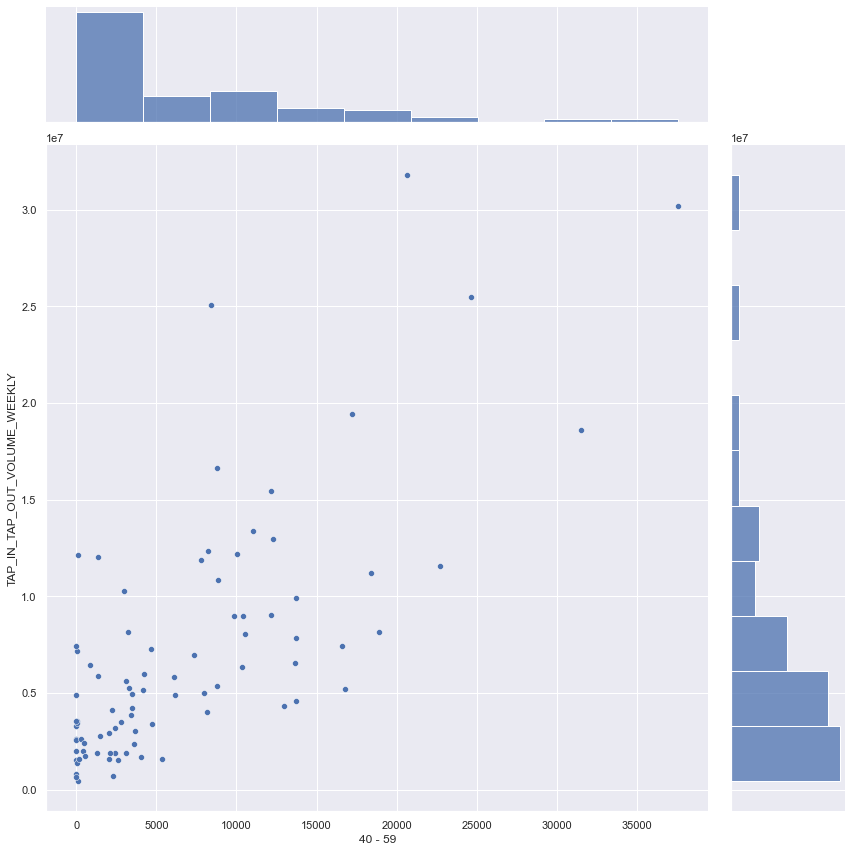

In [54]:
sb.jointplot(data = BusMRTGeoData_reg, x = '40 - 59', y = 'TAP_IN_TAP_OUT_VOLUME_WEEKLY', height = 12)

In [55]:
BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'].corr(BusMRTGeoData_reg['40 - 59'])

0.7356997525223683

In [56]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg['40 - 59'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (64, 1) (64, 1)
Test Set  : (22, 1) (22, 1)


In [57]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

In [58]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [2972483.03730987]
Coefficients 	: a =  [[547.56619669]]


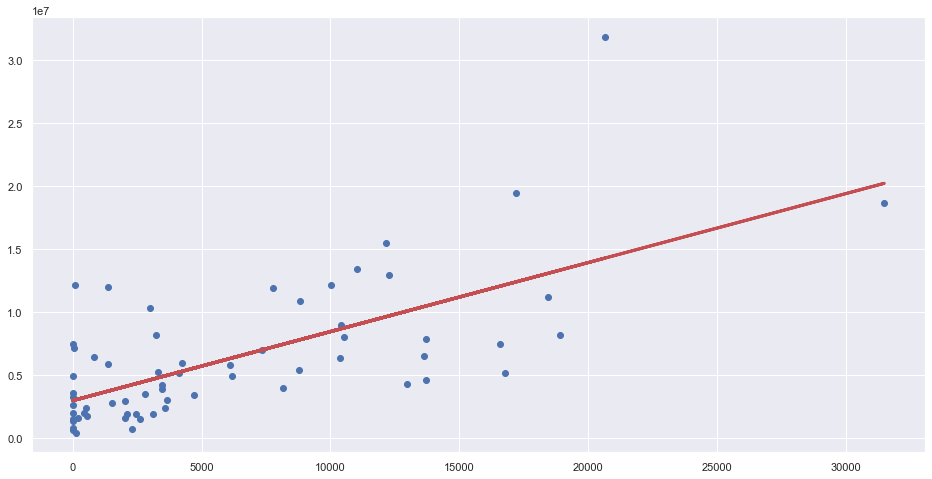

In [59]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [60]:
# Explained Variance in simply the "Score"
ev6 = linreg.score(X_train, y_train)
print("Explained Variance (R^2) \t:", ev6)

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
mse6 = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse6)

Explained Variance (R^2) 	: 0.4496729561325633
Mean Squared Error (MSE) 	: 16080394578817.363


#### Prediction of Response based on the Predictor

Predict `TAP_IN_TAP_OUT_VOLUME_WEEKLY` given `40 - 59` in the Test dataset.

In [61]:
y_test_pred = linreg.predict(X_test)

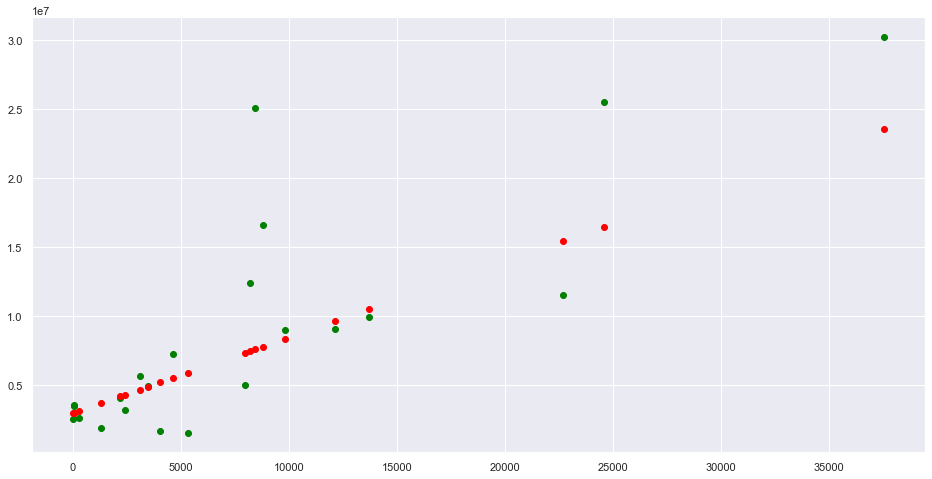

In [62]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [63]:
# Explained Variance in simply the "Score"
evTest6 = linreg.score(X_test, y_test)
print("Explained Variance (R^2) \t:", evTest6)
mseTest6 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mseTest6)

Explained Variance (R^2) 	: 0.5934442316853468
Mean Squared Error (MSE) 	: 27008107240558.812


### Variable 7: Predicting TAP_IN_TAP_OUT_VOLUME_WEEKLY using 60 & Over

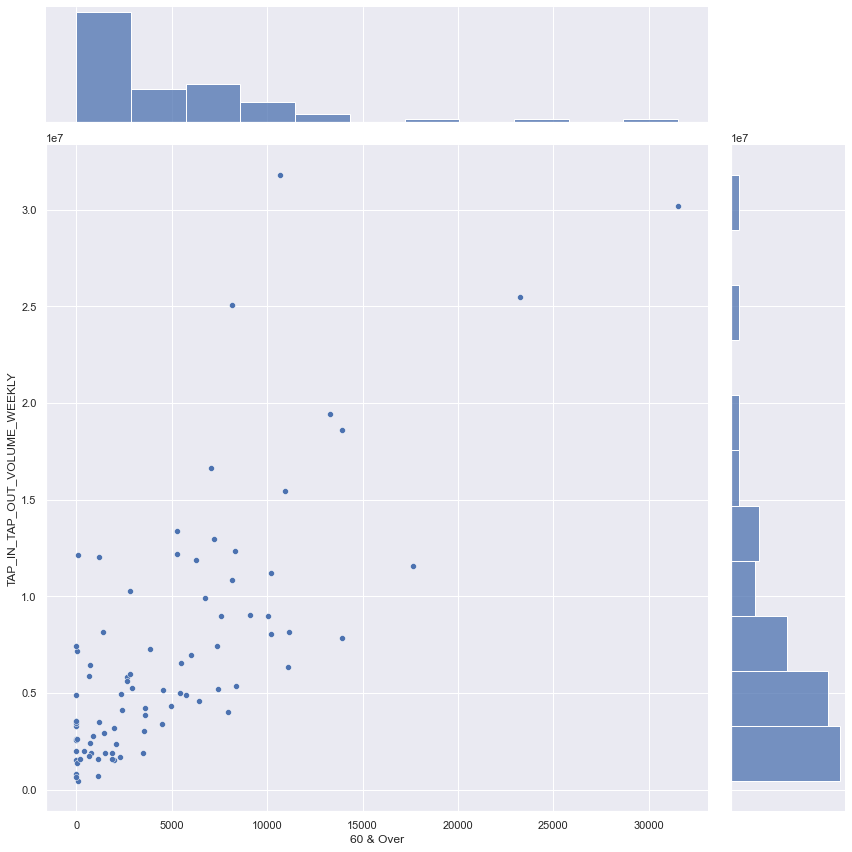

In [64]:
sb.jointplot(data = BusMRTGeoData_reg, x = '60 & Over', y = 'TAP_IN_TAP_OUT_VOLUME_WEEKLY', height = 12)

In [65]:
BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'].corr(BusMRTGeoData_reg['60 & Over'])

0.7503595742097162

In [66]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg['60 & Over'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (64, 1) (64, 1)
Test Set  : (22, 1) (22, 1)


In [67]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

In [68]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [2827632.24292126]
Coefficients 	: a =  [[903.42278895]]


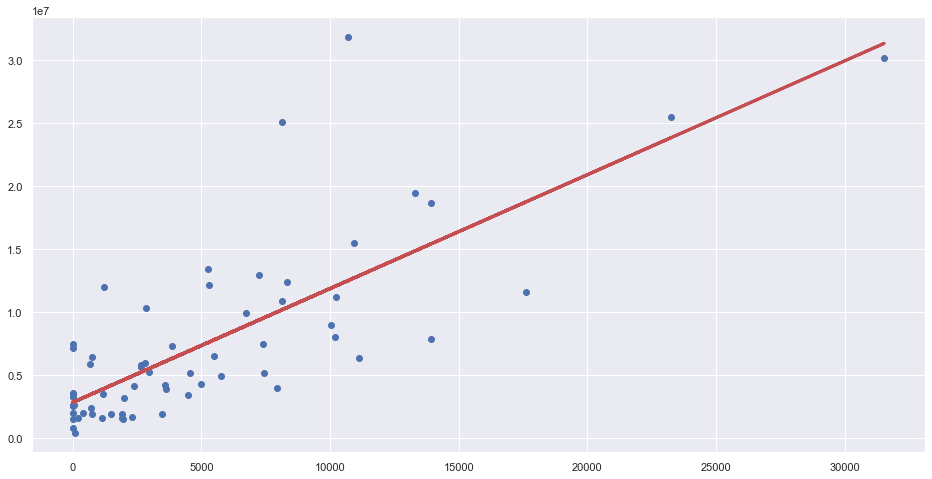

In [69]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [70]:
# Explained Variance in simply the "Score"
ev7 = linreg.score(X_train, y_train)
print("Explained Variance (R^2) \t:", ev7)

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
mse7 = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse7)

Explained Variance (R^2) 	: 0.5975796160010004
Mean Squared Error (MSE) 	: 19106661770447.227


#### Prediction of Response based on the Predictor

Predict `TAP_IN_TAP_OUT_VOLUME_WEEKLY` given `60 & Over` in the Test dataset.

In [71]:
y_test_pred = linreg.predict(X_test)

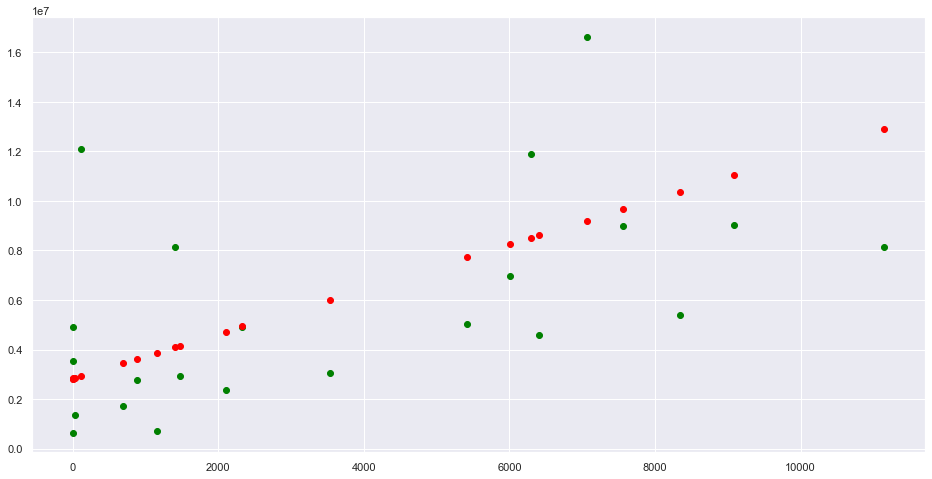

In [72]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [73]:
# Explained Variance in simply the "Score"
evTest7 = linreg.score(X_test, y_test)
print("Explained Variance (R^2) \t:", evTest7)
mseTest7 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mseTest7)

Explained Variance (R^2) 	: 0.20974474603690452
Mean Squared Error (MSE) 	: 12994699004850.56


### Variable 8: Predicting TAP_IN_TAP_OUT_VOLUME_WEEKLY using Average Income

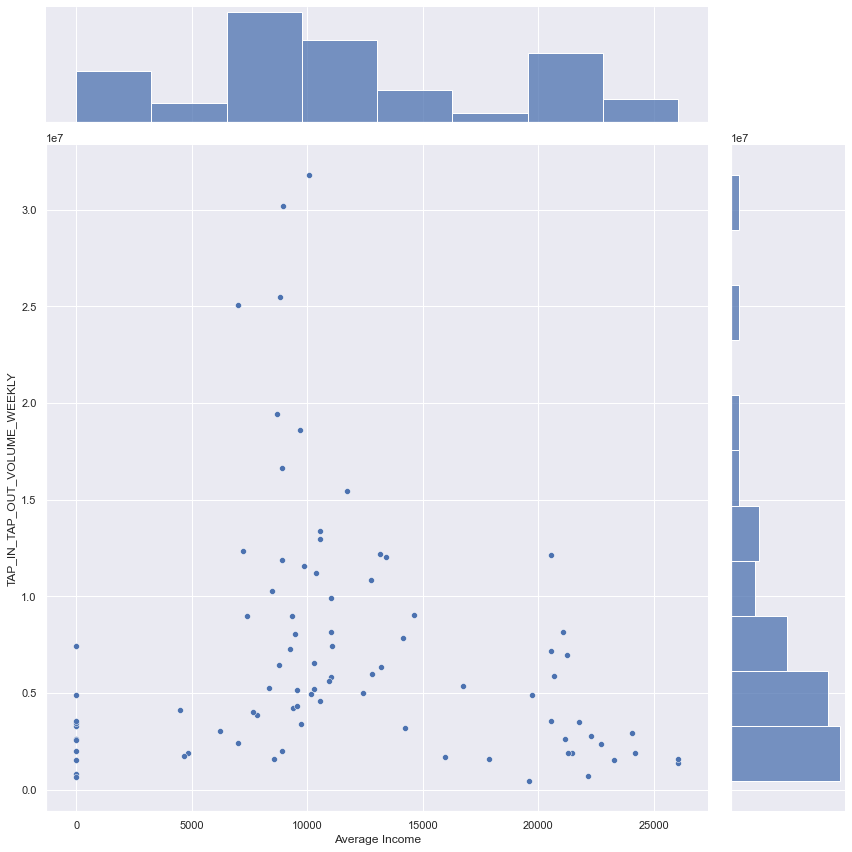

In [74]:
sb.jointplot(data = BusMRTGeoData_reg, x = 'Average Income', y = 'TAP_IN_TAP_OUT_VOLUME_WEEKLY', height = 12)

In [75]:
BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'].corr(BusMRTGeoData_reg['Average Income'])

-0.11799461908286209

In [76]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg['Average Income'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (64, 1) (64, 1)
Test Set  : (22, 1) (22, 1)


In [77]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

In [78]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [7990743.92026944]
Coefficients 	: a =  [[-96.32689344]]


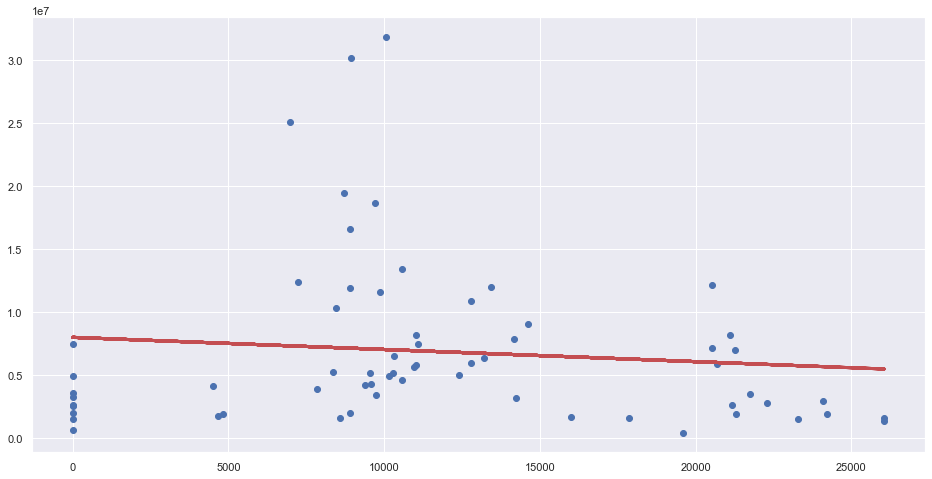

In [79]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [80]:
# Explained Variance in simply the "Score"
ev8 = linreg.score(X_train, y_train)
print("Explained Variance (R^2) \t:", ev8)

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
mse8 = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse8)

Explained Variance (R^2) 	: 0.011420673372298684
Mean Squared Error (MSE) 	: 42202038263480.97


#### Prediction of Response based on the Predictor

Predict `TAP_IN_TAP_OUT_VOLUME_WEEKLY` given `Average Income` in the Test dataset.

In [81]:
y_test_pred = linreg.predict(X_test)

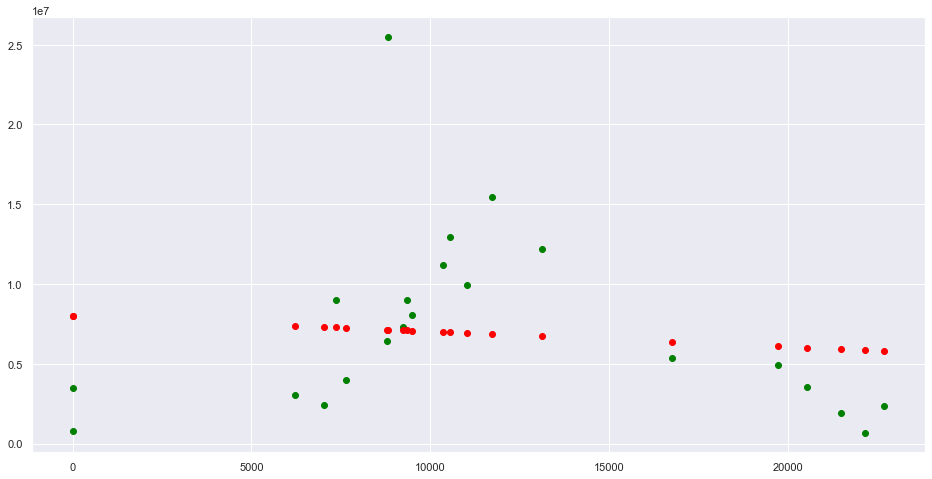

In [82]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [83]:
# Explained Variance in simply the "Score"
evTest8 = linreg.score(X_test, y_test)
print("Explained Variance (R^2) \t:", evTest8)
mseTest8 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mseTest8)

Explained Variance (R^2) 	: 0.018743515485418194
Mean Squared Error (MSE) 	: 31765087175663.977


### Comparing the Uni-Variate Linear Models

In [84]:
variables = ['Peak Hour Percentage', 'Weekday Percentage', 'Male Percentage', '00 - 19', '20 - 39', '40 - 59', '60 & Over', 'Average Income']
ev = [ev1, ev2, ev3, ev4, ev5, ev6, ev7, ev8]
mse = [mse1, mse2, mse3, mse4, mse5, mse6, mse7, mse8]
evTest = [evTest1, evTest2, evTest3, evTest4, evTest5, evTest6, evTest7, evTest8]
mseTest = [mseTest1, mseTest2, mseTest3, mseTest4, mseTest5, mseTest6, mseTest7, mseTest8]

for i in range(8):
    print(variables[i], ": Explained variance(train):", ev[i], "Mean Squared Error(train):", mse[i], "\nExplained variance(test):", evTest[i], "Mean Squared Error(test):", mseTest[i])
    print("\n")

Peak Hour Percentage : Explained variance(train): 0.07520329940145765 Mean Squared Error(train): 40552008295454.7 
Explained variance(test): -0.07525842362167179 Mean Squared Error(test): 29520223808153.3


Weekday Percentage : Explained variance(train): 0.00640658453517573 Mean Squared Error(train): 37974743931284.305 
Explained variance(test): 0.0005101903146543796 Mean Squared Error(test): 44334247529848.08


Male Percentage : Explained variance(train): 0.04135263981925097 Mean Squared Error(train): 46542105530057.46 
Explained variance(test): 0.1301519821125895 Mean Squared Error(test): 12305939639360.832


00 - 19 : Explained variance(train): 0.30745114896496084 Mean Squared Error(train): 25914614704157.48 
Explained variance(test): 0.4874394040028105 Mean Squared Error(test): 23083987098535.746


20 - 39 : Explained variance(train): 0.35204378143691084 Mean Squared Error(train): 22201324155623.35 
Explained variance(test): 0.6787609434507911 Mean Squared Error(test): 180285436553

* `TAP_IN_TAP_OUT_VOLUME_WEEKLY` vs `60 & Over` has the best Explained Variance (R^2) and minimum MSE on both the Train and Test Setsout of the models.   
* 5 variables to be used in the regression models would be `Male Percentage`, `00 - 19`, `20 - 39`, `40 - 59`, `60 & Over`
   


## Multi-Variate Linear Models

### Multi-Variate Regression

In [85]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg[['Male Percentage', '00 - 19', '20 - 39', '40 - 59', '60 & Over']])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(X_train, y_train)

Train Set : (64, 5) (64, 1)
Test Set  : (22, 5) (22, 1)


LinearRegression()

#### Coefficients of the Linear Regression Model

In [86]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [3038909.5991287]
Coefficients 	: a =  [[ 1.05366967e+06 -1.87956152e+03  9.94383814e+02  1.18547607e+03
  -5.23570802e+02]]


#### Prediction of Response based on the Predictor

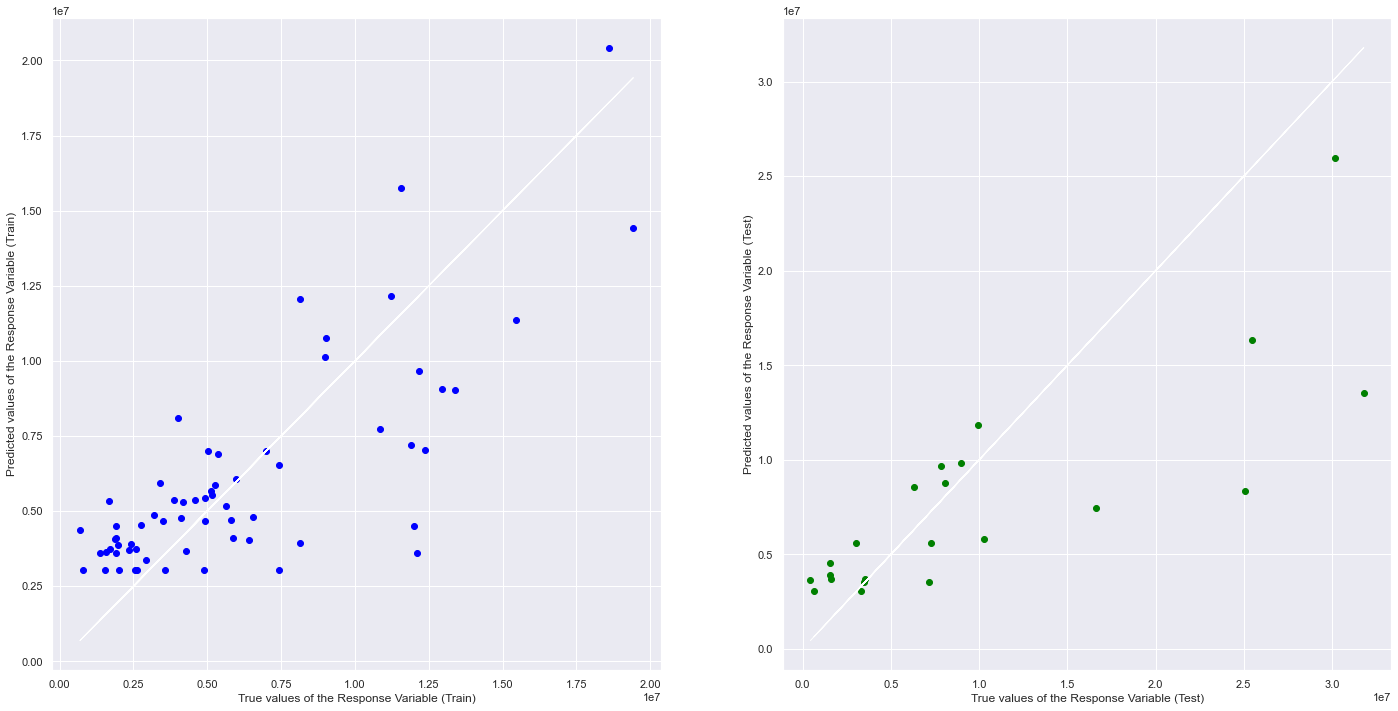

In [87]:
# Predict values corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [88]:
from sklearn.metrics import r2_score
print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))
print("R^2 Score \t:", r2_score(y_test, y_test_pred))

Explained Variance (R^2) on Train Set 	: 0.6007762434245782
Mean Squared Error (MSE) on Train Set 	: 7611620178886.278
Explained Variance (R^2) on Train Set 	: 0.55470401096568
Mean Squared Error (MSE) on Test Set 	: 40482205370387.25
R^2 Score 	: 0.55470401096568


### Decision Tree Regression

In [89]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg[['Male Percentage', '00 - 19', '20 - 39', '40 - 59', '60 & Over']])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

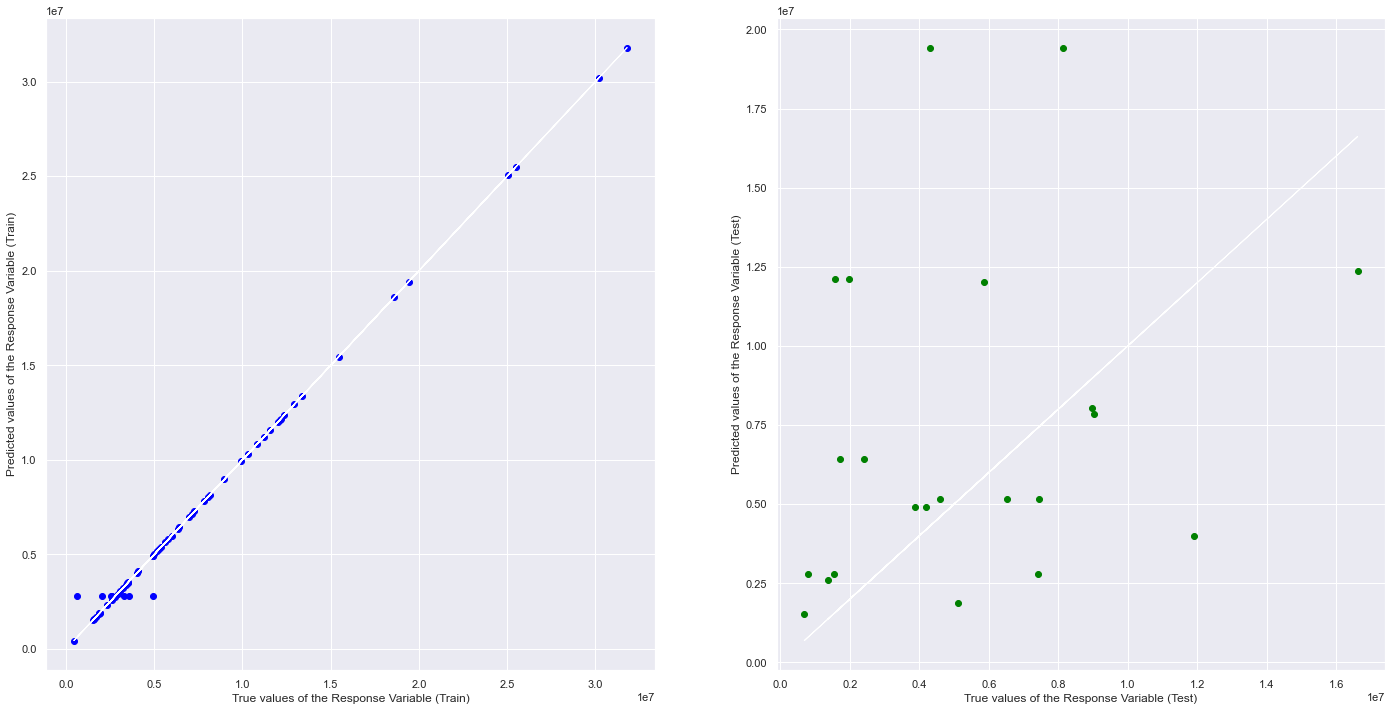

In [90]:
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

#### Goodness of Fit of the Decision Tree Regression Model

In [91]:
from sklearn.metrics import r2_score
print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))
print("R^2 Score \t:", r2_score(y_test, y_test_pred))

Explained Variance (R^2) on Train Set 	: 0.6090069537594132
Mean Squared Error (MSE) on Train Set 	: 165919833619.21875
Explained Variance (R^2) on Train Set 	: 0.4233811046785084
Mean Squared Error (MSE) on Test Set 	: 35344394855454.63
R^2 Score 	: -1.2863128763998293


### Random Forest Regression

In [92]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg[['Male Percentage', '00 - 19', '20 - 39', '40 - 59', '60 & Over']])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

from sklearn.ensemble import RandomForestRegressor
regress = RandomForestRegressor()
regress.fit(X_train, y_train)

<ipython-input-92-113668955895>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regress.fit(X_train, y_train)


RandomForestRegressor()

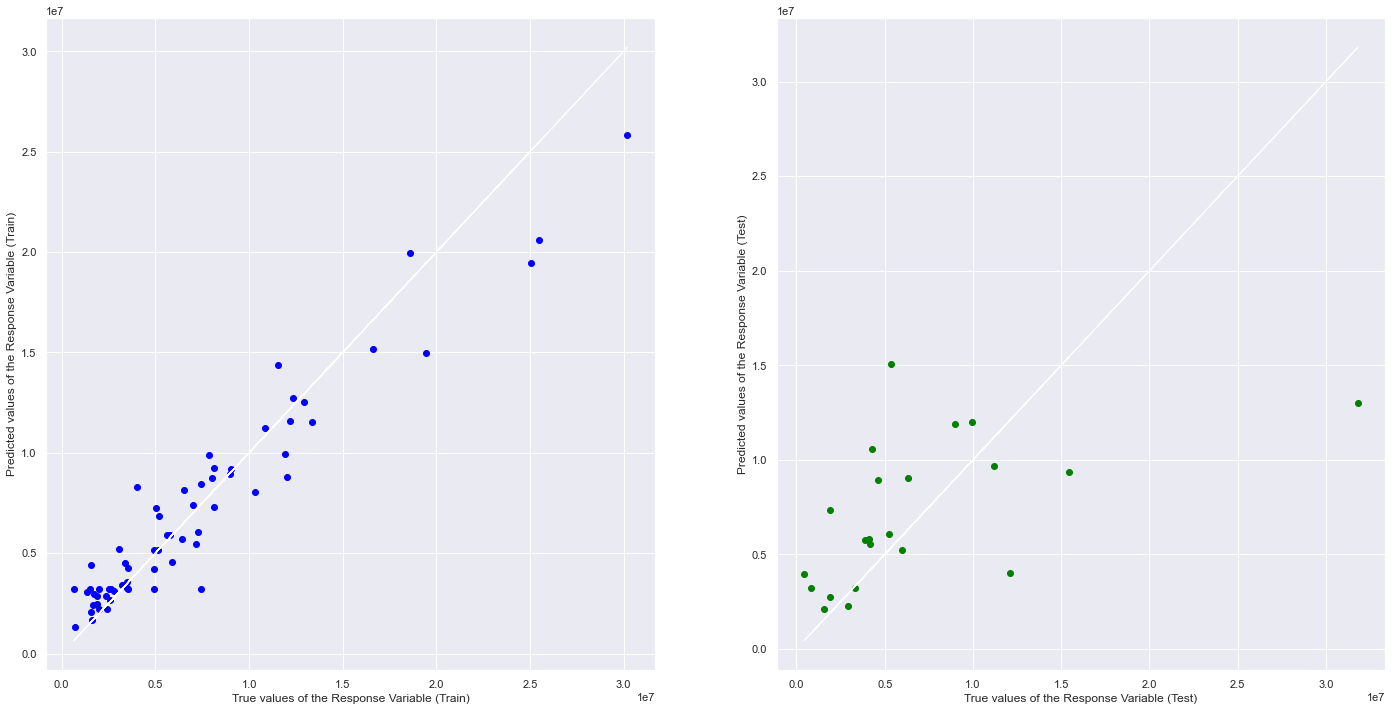

In [93]:
y_train_pred = regress.predict(X_train)
y_test_pred = regress.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

#### Goodness of Fit of the Random Forest Regression Model

In [94]:
from sklearn.metrics import r2_score
print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))
print("R^2 Score \t:", r2_score(y_test, y_test_pred))

Explained Variance (R^2) on Train Set 	: 0.6347179981862747
Mean Squared Error (MSE) on Train Set 	: 3558760178586.304
Explained Variance (R^2) on Train Set 	: 0.5124292399103986
Mean Squared Error (MSE) on Test Set 	: 31361178938383.438
R^2 Score 	: 0.2960118287786899
